あるストリーミングサービスの解約率を調べるという状況を想定する  
まずはデータ生成を行う  

ここで解約率を推定するために利用できるデータは以下のものとする。

| 項目 | 説明 | 分布 |
| --- | --- | --- |
| DaysSinceLastActivity | 最終ログインからの日数 | 指数分布: 平均3日 |
| HasActivePromotionalOffer | 復帰を促したか | 二項分布: 0 or 1 |
| AverageSessionDuration | 平均セッション時間 | ガンマ分布: (2,15) 平均30分 |

In [90]:
using Random

Random.seed!(1234)
n_samples = 1000

1000

10-element Vector{Float64}:
  1.1969417616962357
  3.291472462464336
  3.4586402649586674
  0.09654654251048103
  2.955801849476681
  4.458443789155934
 13.408150636822993
  0.941597966476196
  3.017139117869549
  4.999567970002987

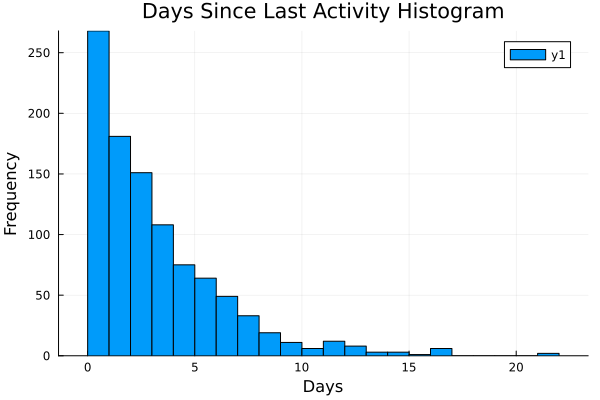

In [91]:
using Distributions
using StatsPlots

DaysSinceLastActivity = rand(Exponential(3), n_samples)
display(first(DaysSinceLastActivity, 10))

histogram(
    DaysSinceLastActivity,
    bins=30,
    title="Days Since Last Activity Histogram",
    xlabel="Days",
    ylabel="Frequency"
)

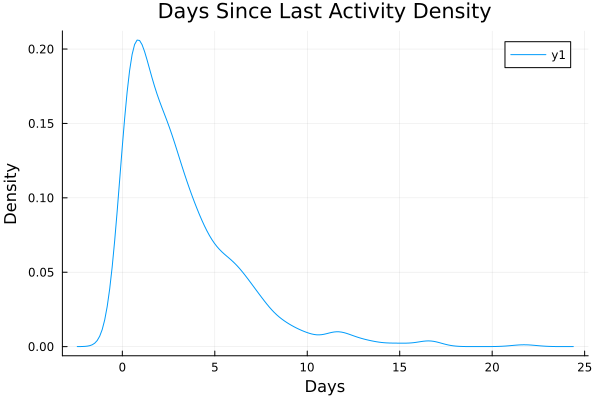

In [92]:
# density plot
density(
    DaysSinceLastActivity,
    title="Days Since Last Activity Density",
    xlabel="Days",
    ylabel="Density",
)

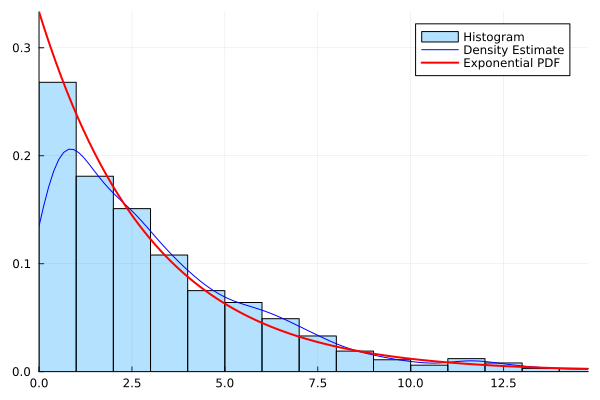

In [93]:
# Combined Histogram and Density plot on the same plot
plots_DaysSinceLastActivity = histogram(
    DaysSinceLastActivity,
    bins=30,
    normalize=true,   # Crucial for density plot
    fillalpha = 0.3,
    linecolor = :black,
    label = "Histogram",
    xlims = (0, quantile(DaysSinceLastActivity, 0.99))
)
density!(
    DaysSinceLastActivity,
    fillalpha = 0.6,
    linecolor = :blue,
    label = "Density Estimate",
)
# 指数関数の確率密度関数
x = range(0, quantile(DaysSinceLastActivity, 0.99), length=100)
plot!(
    x,
    pdf(Exponential(3), x),
    linewidth=2,
    color=:red,
    label="Exponential PDF"
)

display(plots_DaysSinceLastActivity)


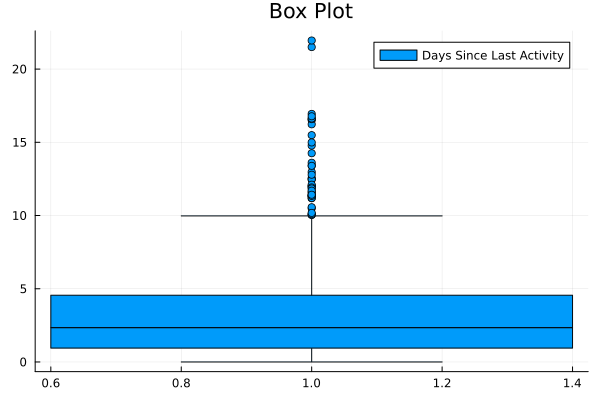

In [94]:
boxplot(
    DaysSinceLastActivity,
    label="Days Since Last Activity",
    title="Box Plot"
)

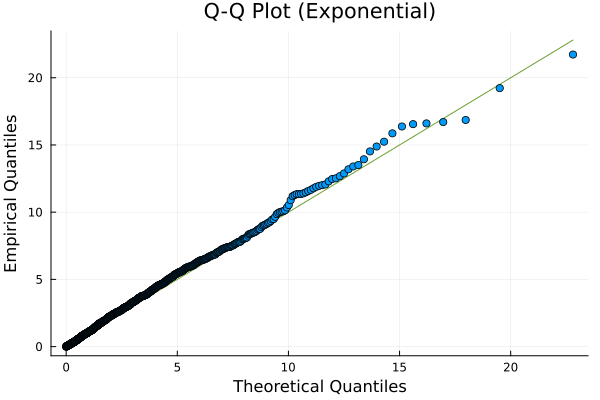

In [95]:
qqplot(
    Exponential(3),
    DaysSinceLastActivity,
    label="Q-Q Plot",
    title="Q-Q Plot (Exponential)",
    xlabel="Theoretical Quantiles",
    ylabel="Empirical Quantiles"
)

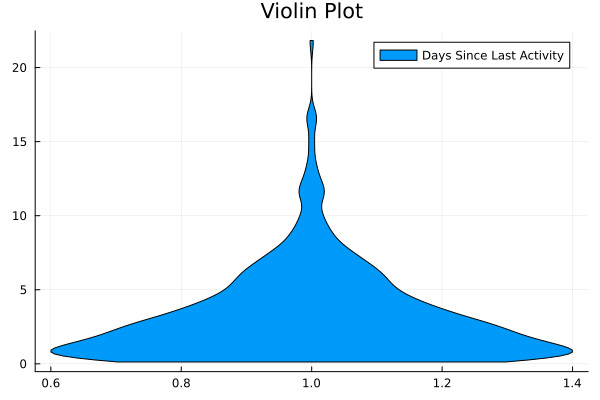

In [96]:
violin(
    DaysSinceLastActivity,
    label="Days Since Last Activity",
    title="Violin Plot"
)

5-element Vector{Int64}:
 0
 1
 1
 0
 0

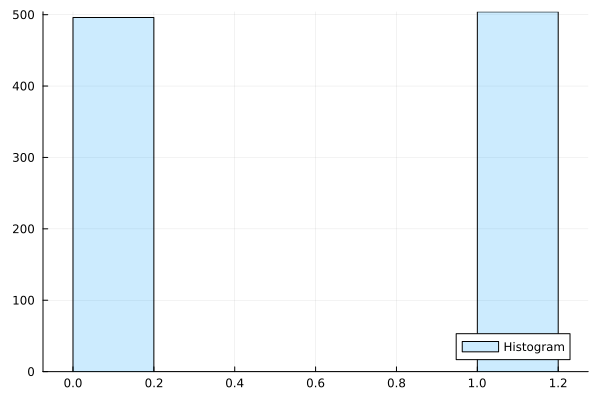

In [97]:
# 次はHasActivePromotionalOffer
HasActivePromotionalOffer = rand([0,1], n_samples)
display(first(HasActivePromotionalOffer, 5))
plots_HasActivePromotionalOffer = histogram(
    HasActivePromotionalOffer,
    fillalpha=0.2,
    label="Histogram"
)
display(plots_HasActivePromotionalOffer)

5-element Vector{Float64}:
 39.26013305811533
 63.38556973255818
 29.298779615357244
 37.88617281099633
 59.433326040070746

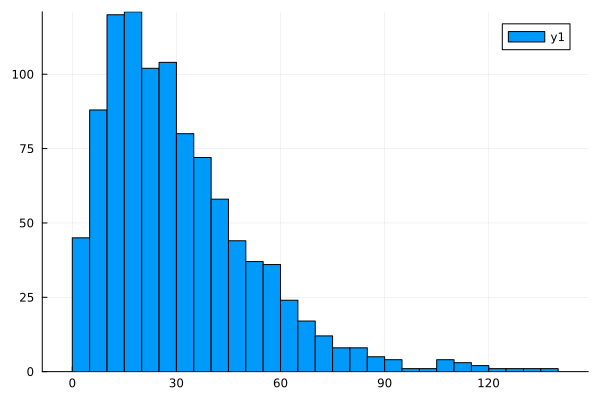

In [98]:
# AverageSessionDuration
# これはガンマ分布(2,15)
AverageSessionDuration = rand(Gamma(2,15), n_samples)
display(first(AverageSessionDuration, 5))
histogram(AverageSessionDuration)

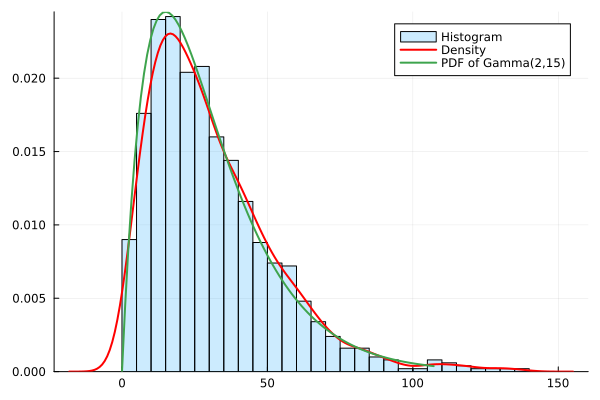

In [99]:
# density & ガンマ分布のpdfも併記
plots_AverageSessionDuration = histogram(
    AverageSessionDuration,
    normalize=true,
    fillalpha=0.2,
    label="Histogram",
)
density!(
    AverageSessionDuration,
    label="Density",
    color="red",
    linewidth=2
)
x = range(0, quantile(AverageSessionDuration, 0.99), length=100)
plot!(
    x,
    pdf(Gamma(2,15), x),
    label="PDF of Gamma(2,15)",
    linewidth=2
)
display(plots_AverageSessionDuration)

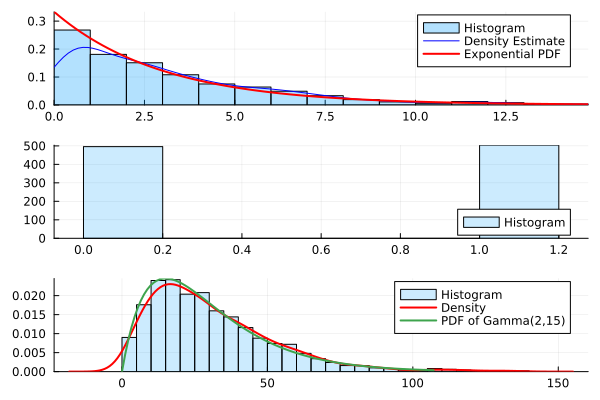

In [100]:
# 3つを並べて表示
plot(
    plots_DaysSinceLastActivity,
    plots_HasActivePromotionalOffer,
    plots_AverageSessionDuration,
    layout=(3,1)
)


In [104]:
# データの作成は完了
# 次は解約率の設定とそのラベルの作成
p_churn = 0.3
labels = zeros(Int, n_samples)

# 解約をシミュレーションしてラベル作成
for i=1:n_samples
    prob_churn =
        p_churn
        * pdf(Exponential(3), n_samples)
end

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///home/tau/repository/Mymljl/src/In[104]#10:9\[90mIn[104]:10:9[0;0m]8;;\
        p_churn
        [48;2;120;70;70m*[0;0m pdf(Exponential(3), n_samples)
[90m#       ╙ ── [0;0m[91mnot a unary operator[0;0m